In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Read Data

In [2]:
df_kanzler = pd.read_csv('data/kanzler_review.csv')
df_fiesta = pd.read_csv('data/fiesta_review.csv')

## Remove Null Values

In [3]:
# check null values
df_kanzler.isnull().sum()
df_fiesta.isna().sum()

# remove null values
df_kanzler = df_kanzler.dropna()
df_fiesta = df_fiesta.dropna()

## Labeling With Threshold Rating (3)

In [4]:
threshold = 3
df_kanzler['label'] = np.where(df_kanzler['rating'] > threshold, 1, 0)
df_fiesta['label'] = np.where(df_fiesta['rating'] > threshold, 1, 0)


## Analisis Deskriptif

In [17]:
# count the unique values in the 'rating' column
df_kanzler['rating'].value_counts()

df_fiesta['rating'].value_counts()

rating
5    7901
4      15
3      11
2       4
1       4
Name: count, dtype: int64

### Summary Dari Rating

In [15]:
# 5 number summary
df_kanzler['rating'].describe()

count    7935.000000
mean        4.991808
std         0.141327
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [16]:
df_fiesta['rating'].describe()

count    2635.000000
mean        4.464516
std         0.864694
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

### Bar Plot Rating

Text(0.5, 1.0, 'Rating Distribution')

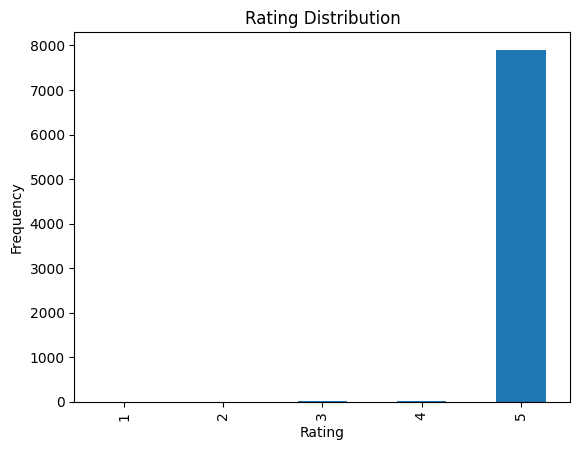

In [19]:
count = df_kanzler['rating'].value_counts()
count = count.sort_index()
count.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')

Text(0.5, 1.0, 'Rating Distribution')

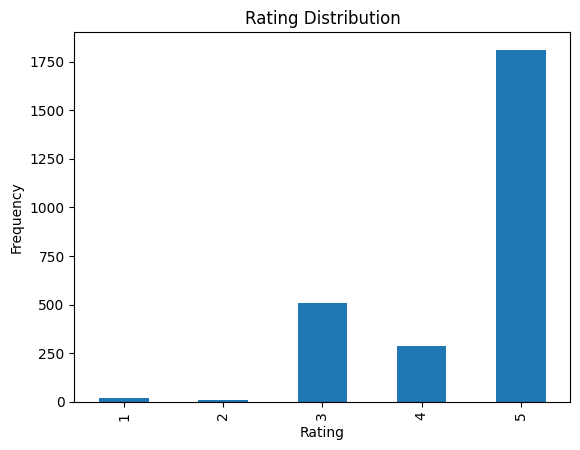

In [20]:
count = df_fiesta['rating'].value_counts()
count = count.sort_index()
count.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')

## Analisis Sentimen

In [25]:
# Change the sentiment to positive and negative
df_kanzler['label_sen'] = df_kanzler['label'].replace({1: 'Positive', 0: 'Negative'})
df_fiesta['label_sen'] = df_fiesta['label'].replace({1: 'Positive', 0: 'Negative'})

Text(0.5, 1.0, 'Sentiment Distribution')

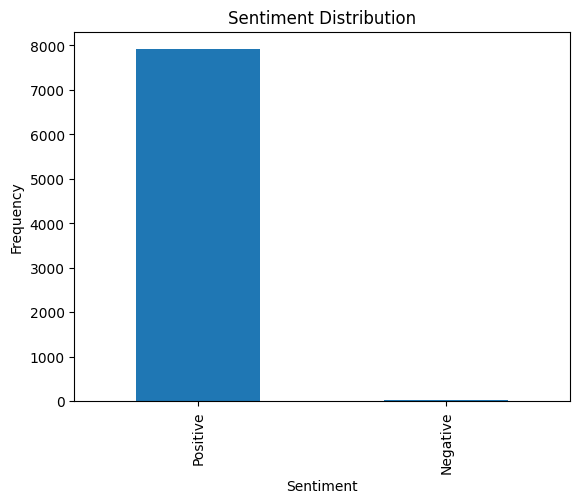

In [26]:
sentiment_count = df_kanzler['label_sen'].value_counts()
sentiment_count.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution Kanzler')

Text(0.5, 1.0, 'Sentiment Distribution Fiesta')

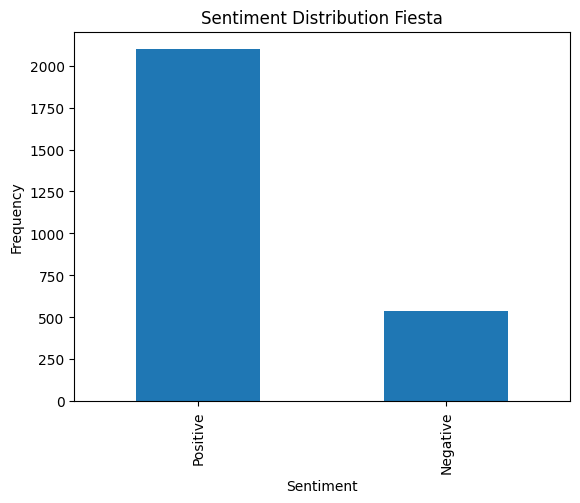

In [27]:
sentiment_count = df_fiesta['label_sen'].value_counts()
sentiment_count.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution Fiesta')

### WorcCloud

In [ ]:
# generate word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = STOPWORDS,
                    min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

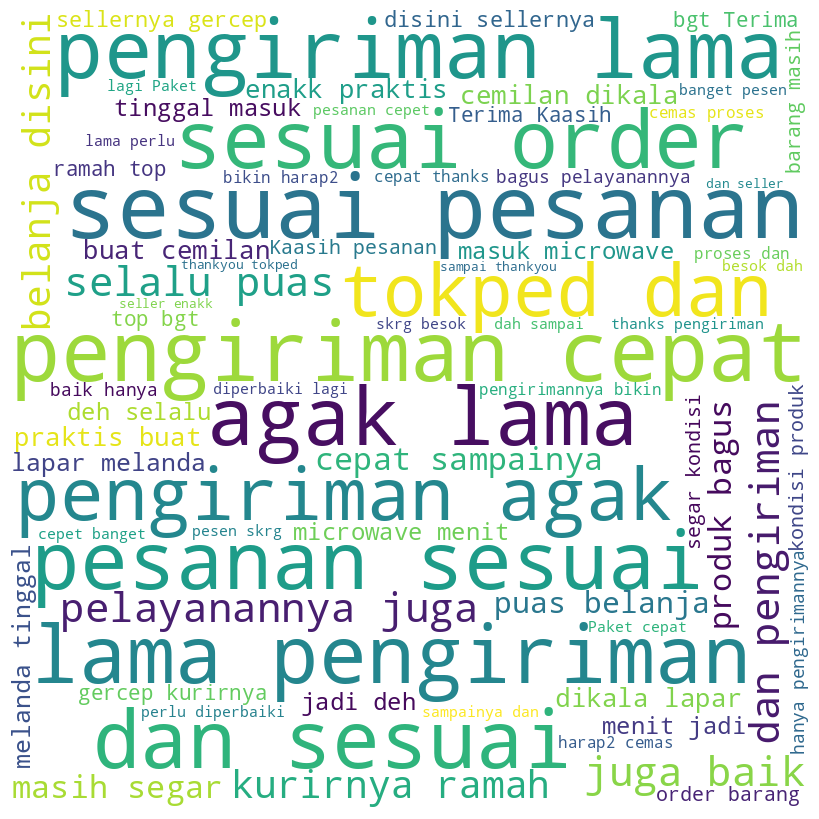

In [9]:
# apply the function to the 'review' column
generate_word_cloud(' '.join(df_fiesta['review']))


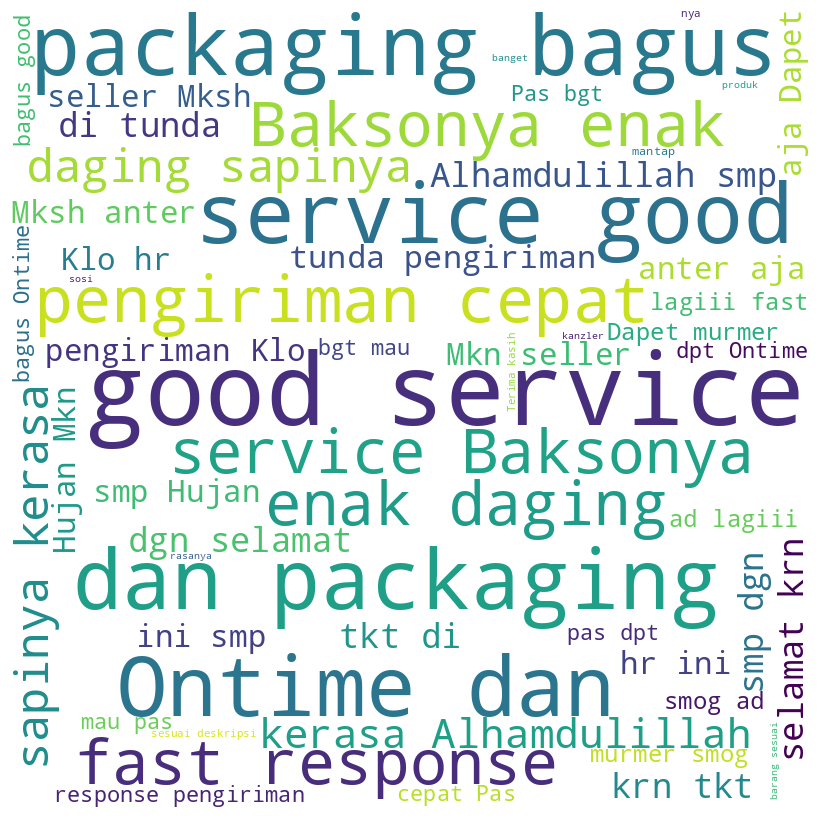

In [10]:
generate_word_cloud(' '.join(df_kanzler['review']))